# Data Normalization Tutorial

Data normalization is a critical preprocessing step in many machine learning workflows, helping to ensure that the model treats all features equally, especially when they are measured on different scales. Below, I'll provide Python code for several common data normalization techniques: Min-Max Scaling, Z-score Normalization, Robust Scaling, and Unit Vector Scaling. We will use Python's scikit-learn library to demonstrate these techniques.

## 1. Import Required Libraries

We'll need pandas for data manipulation and scikit-learn for the scaling functions:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## 2. Load and Prepare Your Data

Load your dataset into a DataFrame. Assume it’s stored in a CSV file:

In [46]:
data_url = 'https://raw.githubusercontent.com/chriskhanhtran/kaggle-house-price/refs/heads/master/Data/train.csv'
df = pd.read_csv(data_url, index_col=0)

display(df.head())
print()

print(df.dtypes)
print()

print(df.shape)
print()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object

For the demonstration, let’s assume you want to normalize all numeric columns in the dataset:


In [47]:
# Selecting numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols]

display(data.head())
print()

print(data.shape)
print()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000



(1460, 37)



We handle the missing value using K-Nearest Neighbors Imputation

In [52]:
from sklearn.impute import KNNImputer

# Create an imputer object with KNN
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

display(data.head())
print()

print(data.shape)
print()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0



(1460, 37)



Let's see the BoxPlot of the original data

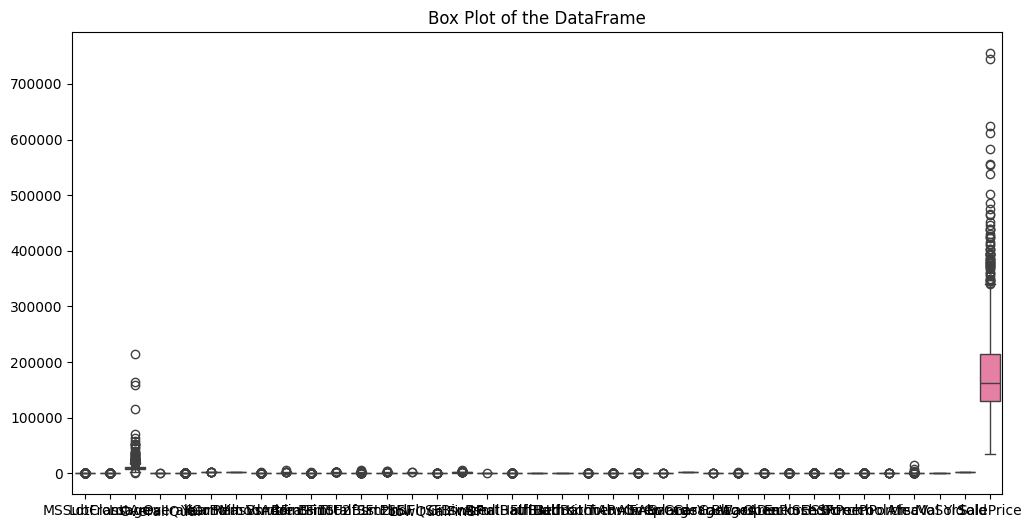

In [58]:
# before normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot of the DataFrame')
plt.show()


## 3. Min-Max Scaling

Min-Max Scaling shrinks the range of feature values to scale between 0 and 1. It is very useful when you need a bounded range and is sensitive to outliers.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709



(1460, 37)



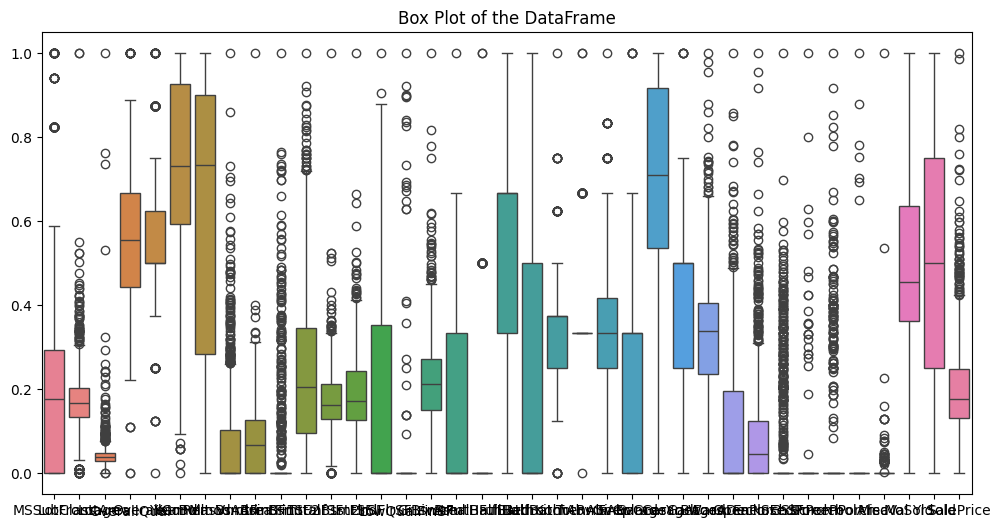

In [54]:
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data
data_min_max = min_max_scaler.fit_transform(data)

# Convert the array back to a DataFrame
df_min_max = pd.DataFrame(data_min_max, columns=numeric_cols)

display(df_min_max.head())
print()

print(df_min_max.shape)
print()

# after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_min_max)
plt.title('Box Plot of the DataFrame')
plt.show()


## 4. Z-Score Normalization

Also known as Standard Scaling, this method scales the data to have zero mean and a variance of one. It's ideal for data that follows a normal distribution and is less sensitive to outliers compared to Min-Max scaling.


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,-0.245849,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.509371,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.041591,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-0.872563,0.397320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574907,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.051930,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0.073375,-0.117215,0.073480,0.651479,-0.517200,0.984752,0.830215,0.321282,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.960589,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0.309859,-0.460239,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574907,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.839087,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0.073375,0.568832,0.375148,1.374795,-0.517200,0.951632,0.733308,1.361303,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.920089,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843



(1460, 37)



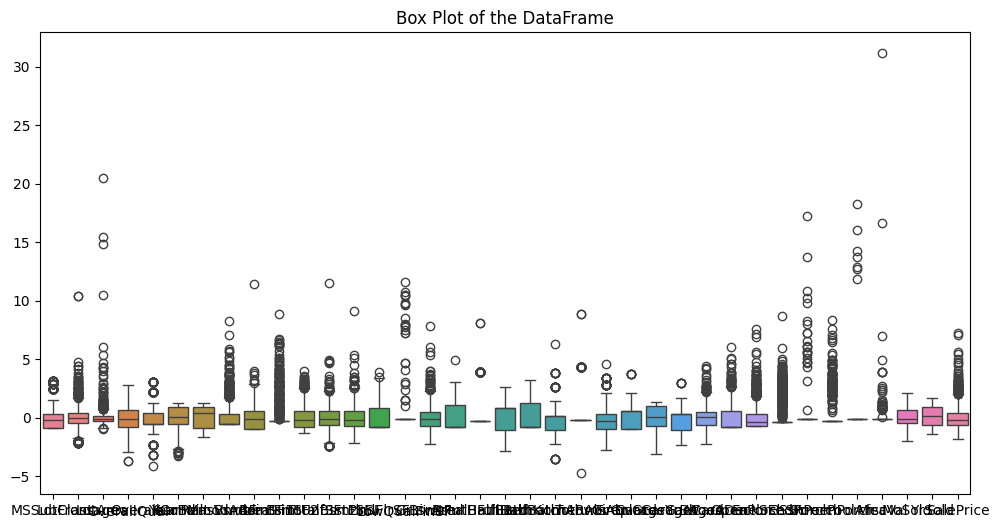

In [55]:
# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the data
data_standard = standard_scaler.fit_transform(data)

# Convert the array back to a DataFrame
df_standard = pd.DataFrame(data_standard, columns=numeric_cols)

display(df_standard.head())
print()

print(df_standard.shape)
print()

# after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standard)
plt.title('Box Plot of the DataFrame')
plt.show()


## 5. Robust Scaling

Robust Scaling uses the median and the interquartile range for scaling. It's particularly useful when the data contains outliers, as it is robust against them.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.2,-0.25,-0.254076,0.5,0.0,0.652174,0.243243,1.180723,0.452790,0.0,-0.559829,-0.269652,-0.453608,1.173077,0.0,0.380070,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.595238,0.0,0.281573,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.541506
1,-0.6,0.50,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.0,-0.330769,0.538308,0.343643,0.000000,0.0,-0.312090,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.047619,0.0,-0.082816,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.220173
2,0.2,-0.10,0.437624,0.5,0.0,0.608696,0.216216,0.975904,0.143910,0.0,-0.074359,-0.142289,-0.327933,1.189560,0.0,0.497489,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.547619,0.0,0.530021,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.720024
3,0.4,-0.50,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,0.0,0.106838,-0.468657,-0.247423,1.038462,0.0,0.390885,1.0,0.0,-1.0,0.0,0.0,0.0,0.5,0.0,0.476190,1.0,0.670807,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,-0.273728
4,0.2,0.70,1.181201,1.0,0.0,0.586957,0.162162,2.108434,0.381186,0.0,0.021368,0.305473,0.113893,1.446429,0.0,1.134029,1.0,0.0,0.0,1.0,1.0,0.0,1.5,0.0,0.523810,1.0,1.474120,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,1.035406



(1460, 37)



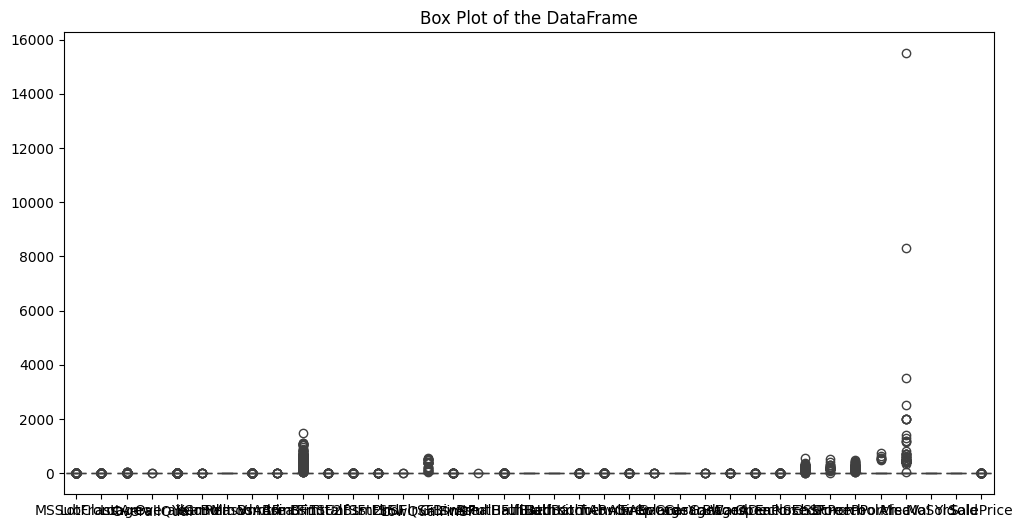

In [56]:
# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data
data_robust = robust_scaler.fit_transform(data)

# Convert the array back to a DataFrame
df_robust = pd.DataFrame(data_robust, columns=numeric_cols)

display(df_robust.head())
print()

print(df_robust.shape)
print()

# after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_robust)
plt.title('Box Plot of the DataFrame')
plt.show()


## 6. Unit Vector Scaling

Unit Vector Scaling scales the feature vector for each data point to have a Euclidean length of one. This type of scaling is often used when using cosine similarity measures.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000287,0.000311,0.040484,0.000034,0.000024,0.009596,0.009596,0.000939,0.003382,0.0,0.000719,0.004101,0.004101,0.004092,0.0,0.008193,0.000005,0.000000,0.000010,0.000005,0.000014,0.000005,0.000038,0.000000,0.009596,0.000010,0.002625,0.000000,0.000292,0.000000,0.0,0.0,0.0,0.0,0.000010,0.009620,0.998927
1,0.000110,0.000440,0.052801,0.000033,0.000044,0.010868,0.010868,0.000000,0.005379,0.0,0.001562,0.006941,0.006941,0.000000,0.0,0.006941,0.000000,0.000006,0.000011,0.000000,0.000017,0.000006,0.000033,0.000006,0.010868,0.000011,0.002530,0.001639,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000028,0.011039,0.998274
2,0.000268,0.000304,0.050261,0.000031,0.000022,0.008940,0.008944,0.000724,0.002171,0.0,0.001939,0.004110,0.004110,0.003869,0.0,0.007979,0.000004,0.000000,0.000009,0.000004,0.000013,0.000004,0.000027,0.000004,0.008940,0.000009,0.002716,0.000000,0.000188,0.000000,0.0,0.0,0.0,0.0,0.000040,0.008971,0.998511
3,0.000499,0.000427,0.068019,0.000050,0.000036,0.013639,0.014031,0.000000,0.001538,0.0,0.003846,0.005385,0.006845,0.005385,0.0,0.012229,0.000007,0.000000,0.000007,0.000000,0.000021,0.000007,0.000050,0.000007,0.014231,0.000021,0.004573,0.000000,0.000249,0.001937,0.0,0.0,0.0,0.0,0.000014,0.014288,0.997139
4,0.000240,0.000335,0.056936,0.000032,0.000020,0.007985,0.007985,0.001397,0.002615,0.0,0.001956,0.004572,0.004572,0.004204,0.0,0.008776,0.000004,0.000000,0.000008,0.000004,0.000016,0.000004,0.000036,0.000004,0.007985,0.000012,0.003338,0.000767,0.000335,0.000000,0.0,0.0,0.0,0.0,0.000048,0.008017,0.998169



(1460, 37)



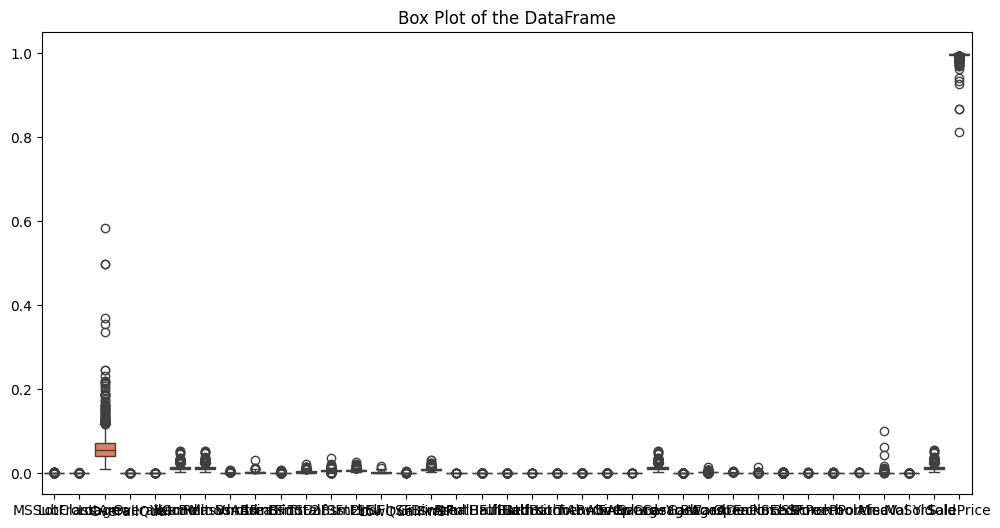

In [57]:
# Initialize the Normalizer
normalizer = Normalizer()

# Fit and transform the data
data_normalized = normalizer.fit_transform(data)

# Convert the array back to a DataFrame
df_normalized = pd.DataFrame(data_normalized, columns=numeric_cols)

display(df_normalized.head())
print()

print(df_normalized.shape)
print()

# after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_normalized)
plt.title('Box Plot of the DataFrame')
plt.show()


## Explanation and Use Cases:

- Min-Max Scaling: Good for cases when you need values in a bounded interval. Susceptible to outliers as they can compress the majority of the data into a narrow range.

- Z-Score Normalization: Suitable for data with properties of a normal distribution. This method standardizes the features so that they are centered around 0 with a standard deviation of 1.

- Robust Scaling: Best for datasets with outliers. This method uses more robust estimates for the center and range of your data.

- Unit Vector Scaling: Useful for text data or when using algorithms that rely on the cosine of angle between vectors.